# Исследовательский анализ данных Amazon Market Data

## Подготовка *данных*

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')



# 1. Предобработка данных

In [ ]:
# Загрузка данных
df = pd.read_csv('/content/drive/MyDrive/PN14/amazon_market_data.csv', sep=',', encoding='utf-8')

# Сначала посмотрим исходные названия столбцов
print("Исходные названия столбцов:")
print(df.columns.tolist())
print("\n" + "="*80 + "\n")

# Приведение названий столбцов к camel case
def to_camel_case(column_name):
    # Убираем пробелы, делаем первое слово с маленькой буквы, остальные с заглавной
    words = column_name.strip().split()
    if len(words) == 1:
        return words[0].lower()
    else:
        camel_case = words[0].lower() + ''.join(word.capitalize() for word in words[1:])
        return camel_case

# Применяем преобразование
original_columns = df.columns.tolist()
df.columns = [to_camel_case(col) for col in df.columns]

# Исправляем названия столбцов с дефисами
df.columns = [col.replace('-', '') for col in df.columns]
print("Исправленные названия столбцов:")
print(df.columns.tolist())

print("Новые названия столбцов:")
for orig, new in zip(original_columns, df.columns):
    print(f"{orig} -> {new}")

print("\n" + "="*80 + "\n")
print("Типы данных:")
print(df.dtypes)

# Преобразование типов данных
df['orderDate'] = pd.to_datetime(df['orderDate'], format='%d-%m-%y')

# Проверка на пропуски
print("\nПропуски в данных:")
print(df.isnull().sum())

# Проверка на дубликаты
print(f"\nКоличество полных дубликатов: {df.duplicated().sum()}")

# Удаление дубликатов если есть
if df.duplicated().sum() > 0:
    df = df.drop_duplicates()
    print(f"Дубликаты удалены. Новый размер датасета: {df.shape}")

Исходные названия столбцов:
['Order Date', 'Row ID', 'Order ID', 'Ship Mode', 'Customer ID', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit']


Исправленные названия столбцов:
['orderDate', 'rowId', 'orderId', 'shipMode', 'customerId', 'segment', 'country', 'city', 'state', 'postalCode', 'region', 'productId', 'category', 'subcategory', 'productName', 'sales', 'quantity', 'discount', 'profit']
Новые названия столбцов:
Order Date -> orderDate
Row ID -> rowId
Order ID -> orderId
Ship Mode -> shipMode
Customer ID -> customerId
Segment -> segment
Country -> country
City -> city
State -> state
Postal Code -> postalCode
Region -> region
Product ID -> productId
Category -> category
Sub-Category -> subcategory
Product Name -> productName
Sales -> sales
Quantity -> quantity
Discount -> discount
Profit -> profit


Типы данных:
orderDate       object
rowId            int64
orderId  

In [ ]:
 # Преобразуем дату
df['orderDate'] = pd.to_datetime(df['orderDate'], format='%d-%m-%y')

# 2. Основной анализ

In [ ]:
# 1. Количество уникальных заказов и клиентов
unique_orders = df['orderId'].nunique()
unique_customers = df['customerId'].nunique()

print(f"Количество уникальных заказов: {unique_orders}")
print(f"Количество уникальных клиентов: {unique_customers}")
print(f"Среднее количество заказов на клиента: {unique_orders/unique_customers:.2f}")

Количество уникальных заказов: 1687
Количество уникальных клиентов: 693
Среднее количество заказов на клиента: 2.43


# 2. Анализ локации пользователей

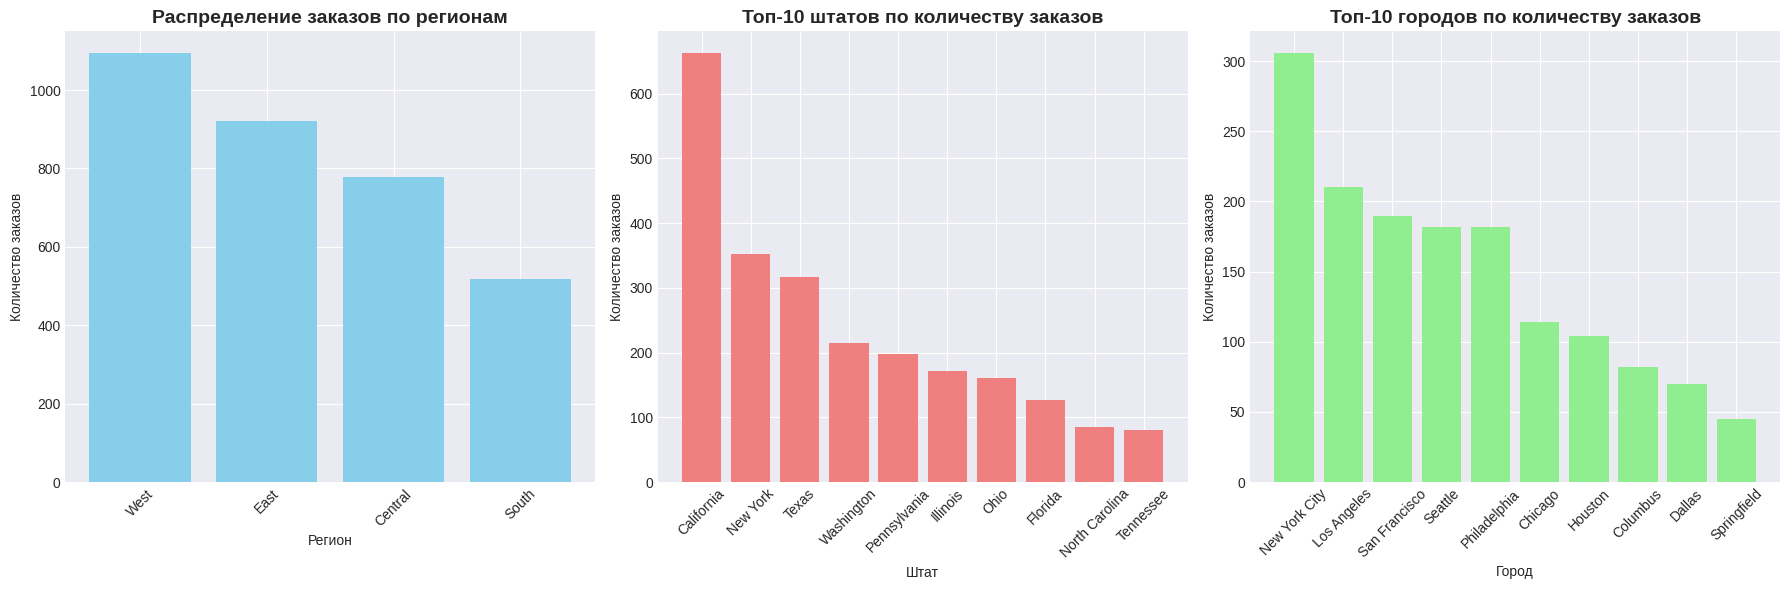


=== АНАЛИЗ ЛОКАЦИЙ ===
Всего регионов: 4
Распределение по регионам:
  West: 1095 заказов (33.1%)
  East: 921 заказов (27.8%)
  Central: 778 заказов (23.5%)
  South: 518 заказов (15.6%)

Всего штатов: 47
Топ-5 штатов по заказам:
  1. California: 663 заказов
  2. New York: 352 заказов
  3. Texas: 317 заказов
  4. Washington: 215 заказов
  5. Pennsylvania: 197 заказов

Всего городов: 350
Топ-5 городов по заказам:
  1. New York City: 306 заказов
  2. Los Angeles: 210 заказов
  3. San Francisco: 190 заказов
  4. Seattle: 182 заказов
  5. Philadelphia: 182 заказов


In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Распределение по регионам
region_orders = df['region'].value_counts()
axes[0].bar(region_orders.index, region_orders.values, color='skyblue')
axes[0].set_title('Распределение заказов по регионам', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Регион')
axes[0].set_ylabel('Количество заказов')
axes[0].tick_params(axis='x', rotation=45)

# Топ-10 штатов по количеству заказов
state_orders = df['state'].value_counts().head(10)
axes[1].bar(state_orders.index, state_orders.values, color='lightcoral')
axes[1].set_title('Топ-10 штатов по количеству заказов', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Штат')
axes[1].set_ylabel('Количество заказов')
axes[1].tick_params(axis='x', rotation=45)

# Топ-10 городов по количеству заказов
city_orders = df['city'].value_counts().head(10)
axes[2].bar(city_orders.index, city_orders.values, color='lightgreen')
axes[2].set_title('Топ-10 городов по количеству заказов', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Город')
axes[2].set_ylabel('Количество заказов')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("\n=== АНАЛИЗ ЛОКАЦИЙ ===")
print(f"Всего регионов: {df['region'].nunique()}")
print("Распределение по регионам:")
for region, count in region_orders.items():
    print(f"  {region}: {count} заказов ({count/len(df)*100:.1f}%)")

print(f"\nВсего штатов: {df['state'].nunique()}")
print("Топ-5 штатов по заказам:")
for i, (state, count) in enumerate(state_orders.head(5).items(), 1):
    print(f"  {i}. {state}: {count} заказов")

print(f"\nВсего городов: {df['city'].nunique()}")
print("Топ-5 городов по заказам:")
for i, (city, count) in enumerate(city_orders.head(5).items(), 1):
    print(f"  {i}. {city}: {count} заказов")

# 3. Анализ локации пользователей

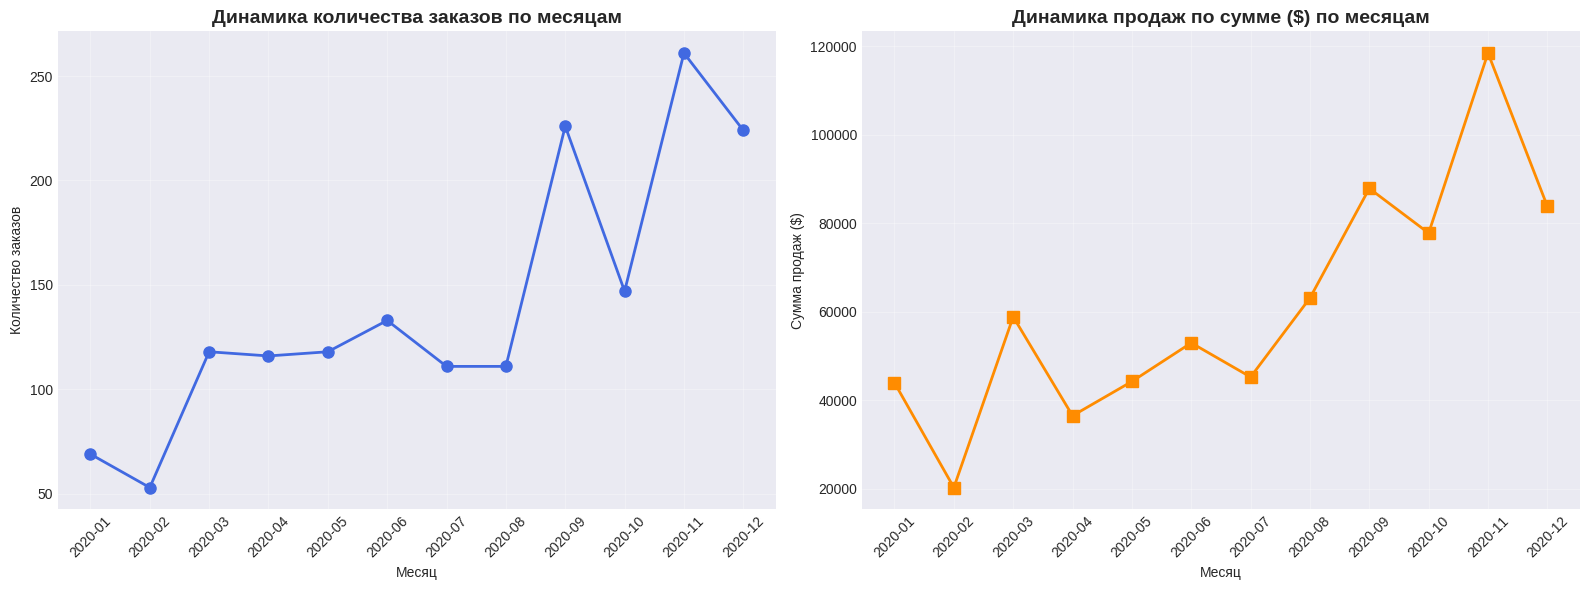


=== АНАЛИЗ ДИНАМИКИ ===
Статистика по месяцам:
  2020-01: 69 заказов, $43,971.37 продаж
  2020-02: 53 заказов, $20,301.13 продаж
  2020-03: 118 заказов, $58,872.35 продаж
  2020-04: 116 заказов, $36,521.54 продаж
  2020-05: 118 заказов, $44,261.11 продаж
  2020-06: 133 заказов, $52,981.73 продаж
  2020-07: 111 заказов, $45,264.42 продаж
  2020-08: 111 заказов, $63,120.89 продаж
  2020-09: 226 заказов, $87,866.65 продаж
  2020-10: 147 заказов, $77,776.92 продаж
  2020-11: 261 заказов, $118,447.82 продаж
  2020-12: 224 заказов, $83,829.32 продаж

Пик заказов: 2020-11 (261 заказов)
Минимум заказов: 2020-02 (53 заказов)
Пик продаж: 2020-11 ($118,447.82)
Минимум продаж: 2020-02 ($20,301.13)


In [ ]:
df['orderMonth'] = df['orderDate'].dt.to_period('M')
monthly_orders = df.groupby('orderMonth')['orderId'].nunique()
monthly_sales = df.groupby('orderMonth')['sales'].sum()

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].plot(monthly_orders.index.astype(str), monthly_orders.values,
            marker='o', linewidth=2, markersize=8, color='royalblue')
axes[0].set_title('Динамика количества заказов по месяцам', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Месяц')
axes[0].set_ylabel('Количество заказов')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, alpha=0.3)

axes[1].plot(monthly_sales.index.astype(str), monthly_sales.values,
            marker='s', linewidth=2, markersize=8, color='darkorange')
axes[1].set_title('Динамика продаж по сумме ($) по месяцам', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Месяц')
axes[1].set_ylabel('Сумма продаж ($)')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n=== АНАЛИЗ ДИНАМИКИ ===")
print("Статистика по месяцам:")
for month, orders in monthly_orders.items():
    sales = monthly_sales[month]
    print(f"  {month}: {orders} заказов, ${sales:,.2f} продаж")

max_month = monthly_orders.idxmax()
min_month = monthly_orders.idxmin()
print(f"\nПик заказов: {max_month} ({monthly_orders[max_month]} заказов)")
print(f"Минимум заказов: {min_month} ({monthly_orders[min_month]} заказов)")
print(f"Пик продаж: {monthly_sales.idxmax()} (${monthly_sales.max():,.2f})")
print(f"Минимум продаж: {monthly_sales.idxmin()} (${monthly_sales.min():,.2f})")

# 4. Анализ категорий

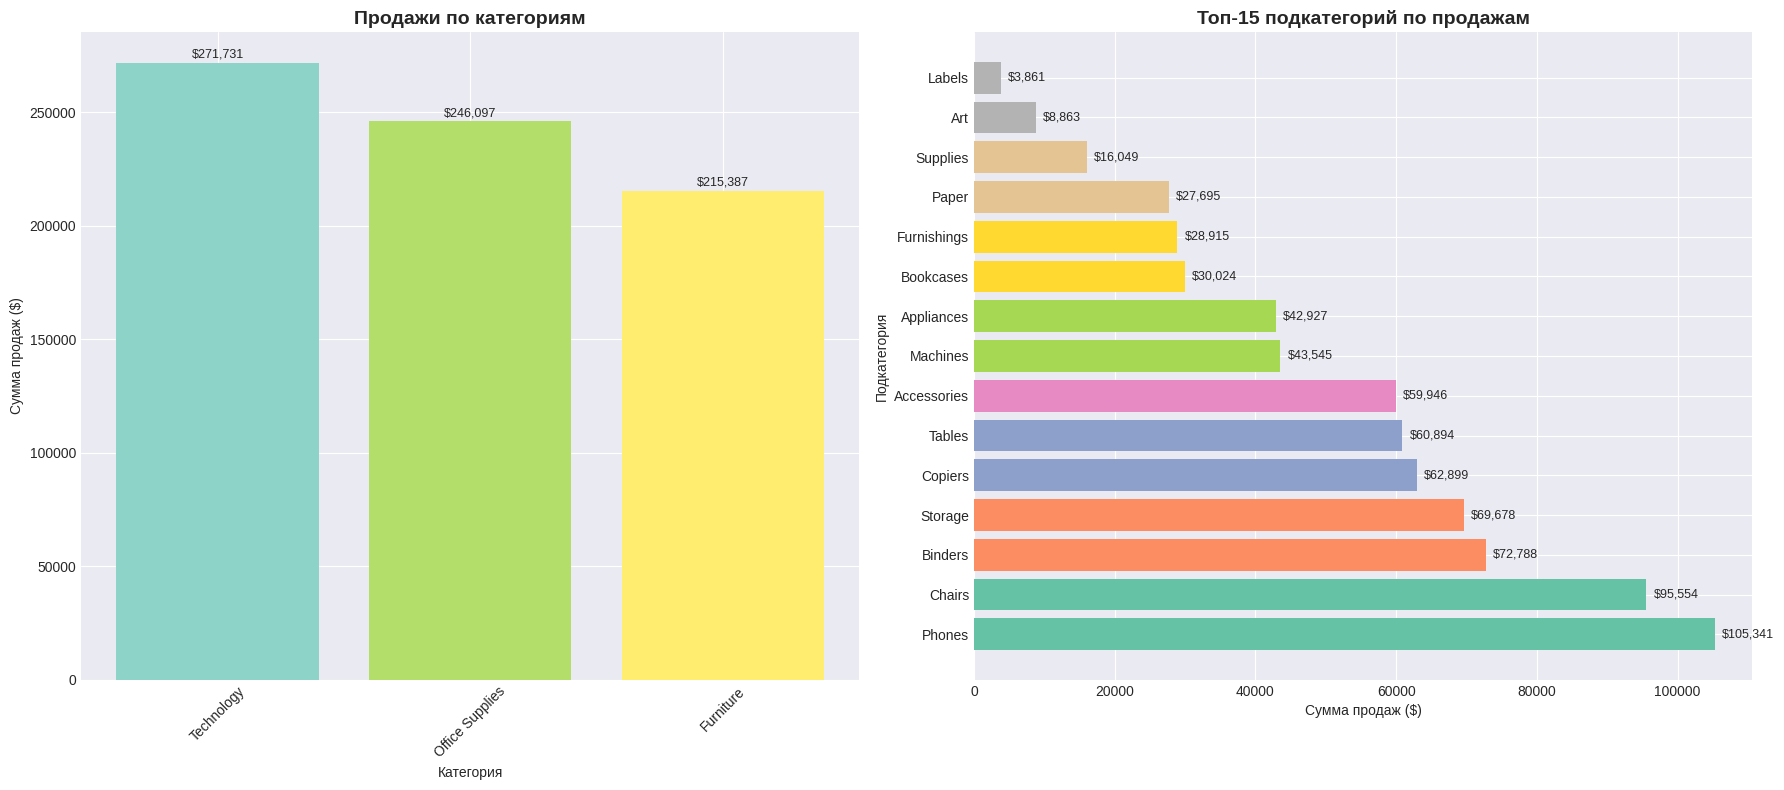


=== АНАЛИЗ КАТЕГОРИЙ ===
Категорий товаров: 3
Подкатегорий товаров: 17

Топ-3 категории по продажам:
  1. Technology: $271,730.81 (37.1%)
  2. Office Supplies: $246,097.17 (33.6%)
  3. Furniture: $215,387.27 (29.4%)

Топ-5 подкатегорий по продажам:
  1. Phones: $105,340.52 (14.4%)
  2. Chairs: $95,554.35 (13.0%)
  3. Binders: $72,788.04 (9.9%)
  4. Storage: $69,677.62 (9.5%)
  5. Copiers: $62,899.39 (8.6%)


In [ ]:
category_sales = df.groupby('category')['sales'].sum().sort_values(ascending=False)
subcategory_sales = df.groupby('subcategory')['sales'].sum().sort_values(ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(18, 8))

colors1 = plt.cm.Set3(np.linspace(0, 1, len(category_sales)))
bars1 = axes[0].bar(category_sales.index, category_sales.values, color=colors1)
axes[0].set_title('Продажи по категориям', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Категория')
axes[0].set_ylabel('Сумма продаж ($)')
axes[0].tick_params(axis='x', rotation=45)

for bar in bars1:
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height + 1000,
                f'${height:,.0f}', ha='center', va='bottom', fontsize=9)

top_subcategories = subcategory_sales.head(15)
colors2 = plt.cm.Set2(np.linspace(0, 1, len(top_subcategories)))
bars2 = axes[1].barh(top_subcategories.index, top_subcategories.values, color=colors2)
axes[1].set_title('Топ-15 подкатегорий по продажам', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Сумма продаж ($)')
axes[1].set_ylabel('Подкатегория')

for bar in bars2:
    width = bar.get_width()
    axes[1].text(width + 1000, bar.get_y() + bar.get_height()/2.,
                f'${width:,.0f}', ha='left', va='center', fontsize=9)

plt.tight_layout()
plt.show()

print("\n=== АНАЛИЗ КАТЕГОРИЙ ===")
print(f"Категорий товаров: {df['category'].nunique()}")
print(f"Подкатегорий товаров: {df['subcategory'].nunique()}")

print("\nТоп-3 категории по продажам:")
for i, (category, sales) in enumerate(category_sales.head(3).items(), 1):
    percentage = sales / category_sales.sum() * 100
    print(f"  {i}. {category}: ${sales:,.2f} ({percentage:.1f}%)")

print("\nТоп-5 подкатегорий по продажам:")
for i, (subcat, sales) in enumerate(subcategory_sales.head(5).items(), 1):
    percentage = sales / subcategory_sales.sum() * 100
    print(f"  {i}. {subcat}: ${sales:,.2f} ({percentage:.1f}%)")

# 5. Популярные товары

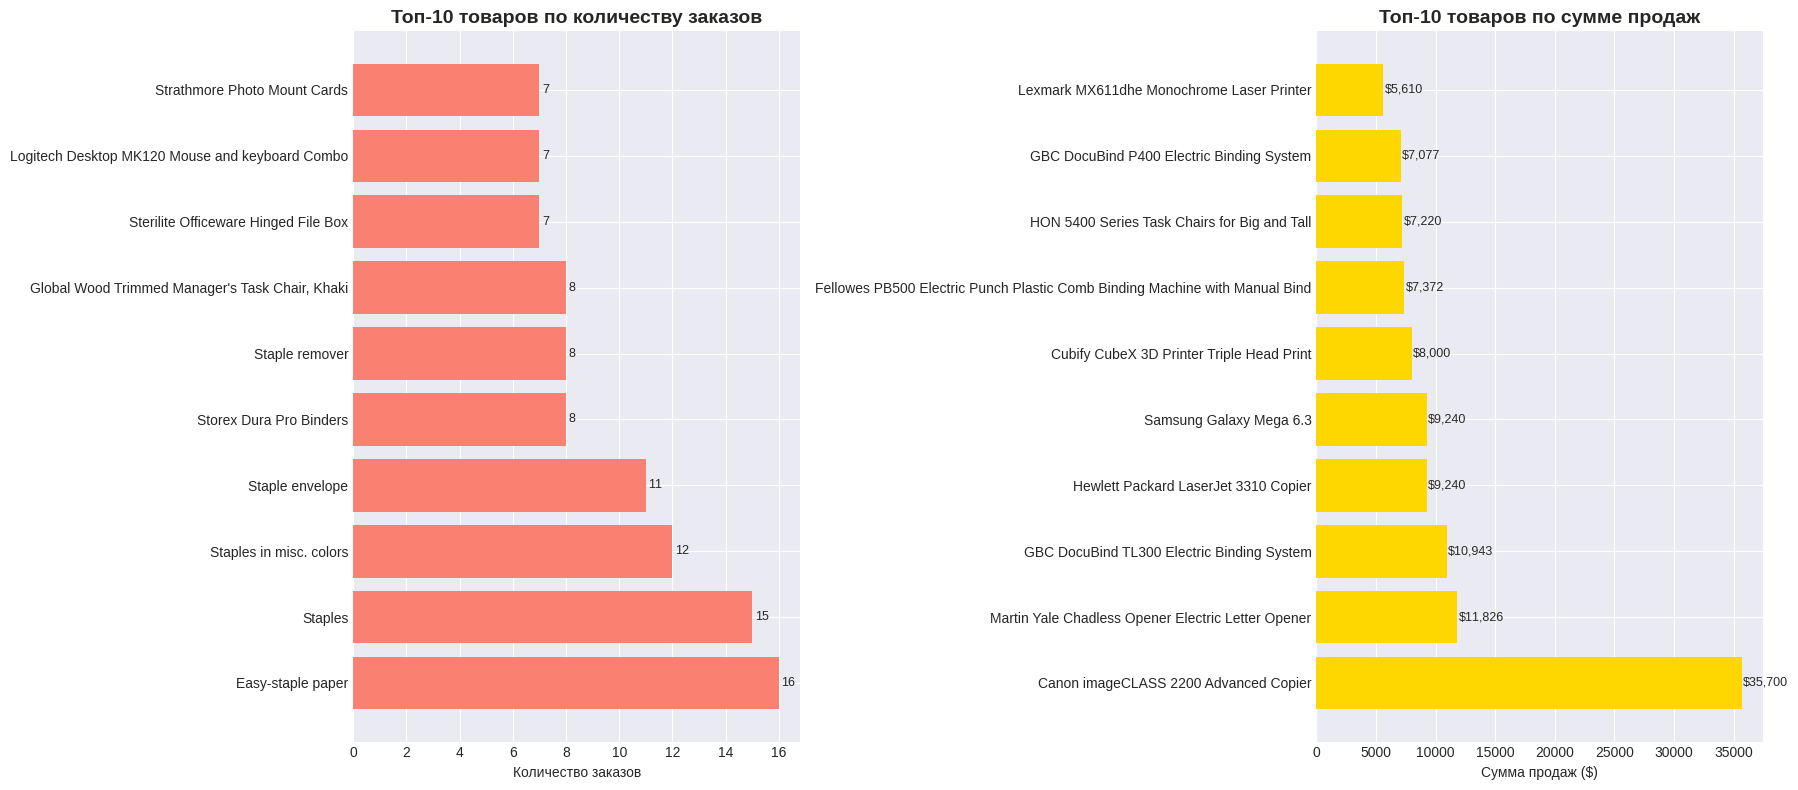


=== АНАЛИЗ ПОПУЛЯРНЫХ ТОВАРОВ ===
Топ-5 товаров по количеству заказов:
  1. Easy-staple paper: 16 заказов
  2. Staples: 15 заказов
  3. Staples in misc. colors: 12 заказов
  4. Staple envelope: 11 заказов
  5. Storex Dura Pro Binders: 8 заказов

Топ-5 товаров по сумме продаж:
  1. Canon imageCLASS 2200 Advanced Copier: $35,699.90
  2. Martin Yale Chadless Opener Electric Letter Opener: $11,825.90
  3. GBC DocuBind TL300 Electric Binding System: $10,943.28
  4. Hewlett Packard LaserJet 3310 Copier: $9,239.85
  5. Samsung Galaxy Mega 6.3: $9,239.78

=== АНАЛИЗ СЕГМЕНТОВ КЛИЕНТОВ ===
    segment  orderId       sales  customerId  avg_order_value  orders_per_customer
   Consumer      876 331904.6999         361       378.886644             2.426593
  Corporate      493 241847.8244         204       490.563538             2.416667
Home Office      318 159462.7309         128       501.455129             2.484375


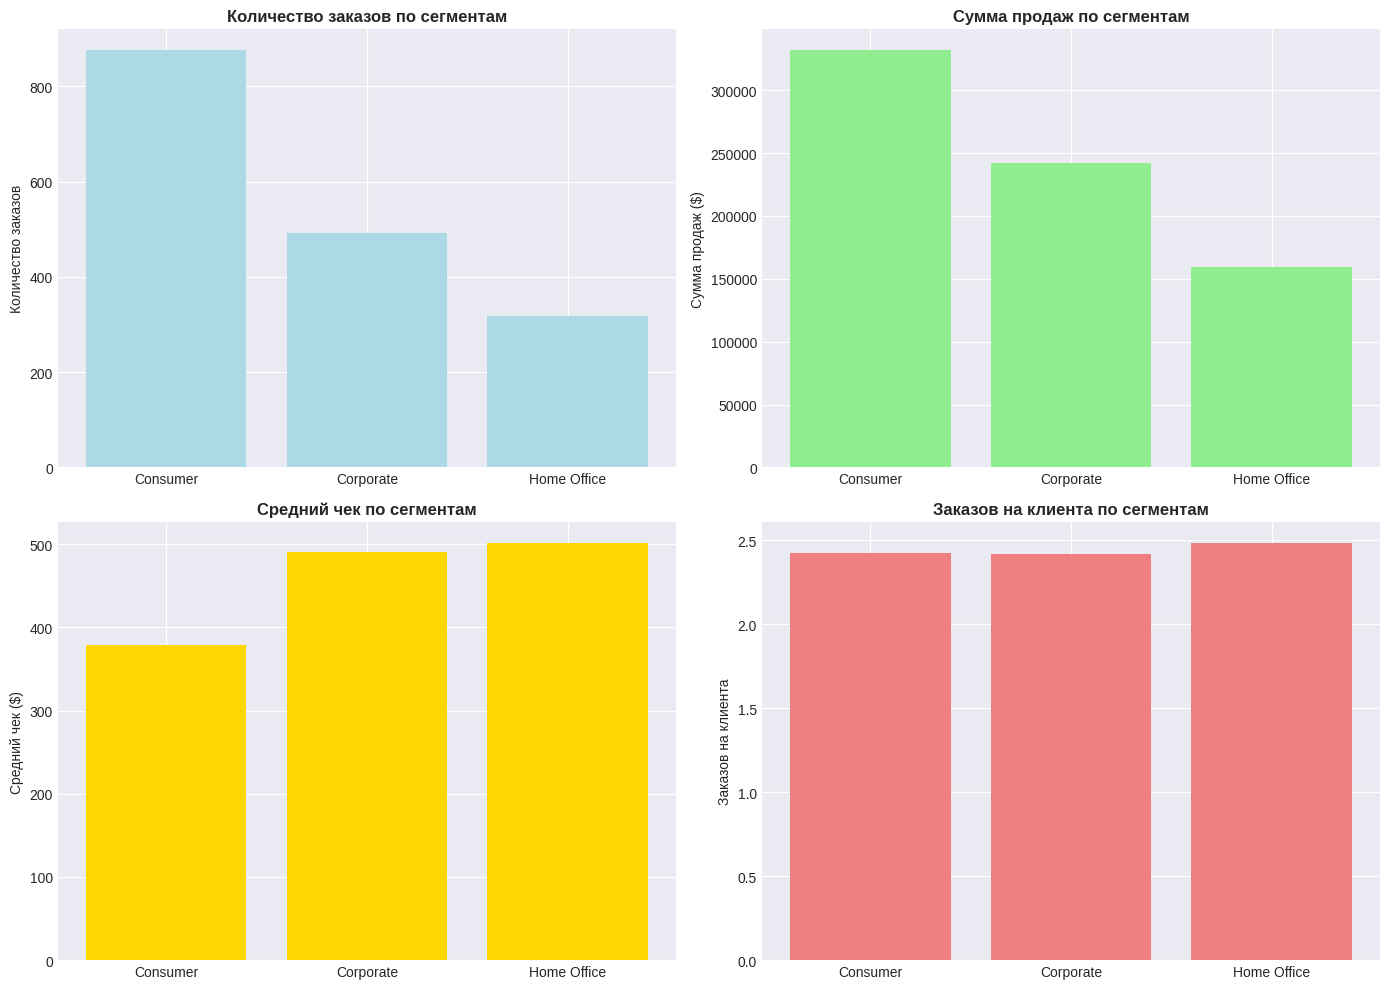

In [ ]:
product_orders = df.groupby('productName')['orderId'].nunique().sort_values(ascending=False).head(10)
product_sales = df.groupby('productName')['sales'].sum().sort_values(ascending=False).head(10)

fig, axes = plt.subplots(1, 2, figsize=(18, 8))

bars1 = axes[0].barh(product_orders.index, product_orders.values, color='salmon')
axes[0].set_title('Топ-10 товаров по количеству заказов', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Количество заказов')

for bar in bars1:
    width = bar.get_width()
    axes[0].text(width + 0.1, bar.get_y() + bar.get_height()/2.,
                f'{int(width)}', ha='left', va='center', fontsize=9)

bars2 = axes[1].barh(product_sales.index, product_sales.values, color='gold')
axes[1].set_title('Топ-10 товаров по сумме продаж', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Сумма продаж ($)')

for bar in bars2:
    width = bar.get_width()
    axes[1].text(width + 100, bar.get_y() + bar.get_height()/2.,
                f'${width:,.0f}', ha='left', va='center', fontsize=9)

plt.tight_layout()
plt.show()

print("\n=== АНАЛИЗ ПОПУЛЯРНЫХ ТОВАРОВ ===")
print("Топ-5 товаров по количеству заказов:")
for i, (product, orders) in enumerate(product_orders.head(5).items(), 1):
    product_short = product[:50] + "..." if len(product) > 50 else product
    print(f"  {i}. {product_short}: {orders} заказов")

print("\nТоп-5 товаров по сумме продаж:")
for i, (product, sales) in enumerate(product_sales.head(5).items(), 1):
    product_short = product[:50] + "..." if len(product) > 50 else product
    print(f"  {i}. {product_short}: ${sales:,.2f}")

# 6. Анализ сегментов клиентов
segment_analysis = df.groupby('segment').agg({
    'orderId': 'nunique',
    'sales': 'sum',
    'customerId': 'nunique'
}).reset_index()

segment_analysis['avg_order_value'] = segment_analysis['sales'] / segment_analysis['orderId']
segment_analysis['orders_per_customer'] = segment_analysis['orderId'] / segment_analysis['customerId']

print("\n=== АНАЛИЗ СЕГМЕНТОВ КЛИЕНТОВ ===")
print(segment_analysis.to_string(index=False))

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

axes[0,0].bar(segment_analysis['segment'], segment_analysis['orderId'], color='lightblue')
axes[0,0].set_title('Количество заказов по сегментам', fontweight='bold')
axes[0,0].set_ylabel('Количество заказов')

axes[0,1].bar(segment_analysis['segment'], segment_analysis['sales'], color='lightgreen')
axes[0,1].set_title('Сумма продаж по сегментам', fontweight='bold')
axes[0,1].set_ylabel('Сумма продаж ($)')

axes[1,0].bar(segment_analysis['segment'], segment_analysis['avg_order_value'], color='gold')
axes[1,0].set_title('Средний чек по сегментам', fontweight='bold')
axes[1,0].set_ylabel('Средний чек ($)')

axes[1,1].bar(segment_analysis['segment'], segment_analysis['orders_per_customer'], color='lightcoral')
axes[1,1].set_title('Заказов на клиента по сегментам', fontweight='bold')
axes[1,1].set_ylabel('Заказов на клиента')

plt.tight_layout()
plt.show()

# 7. Динамика продаж по категориям

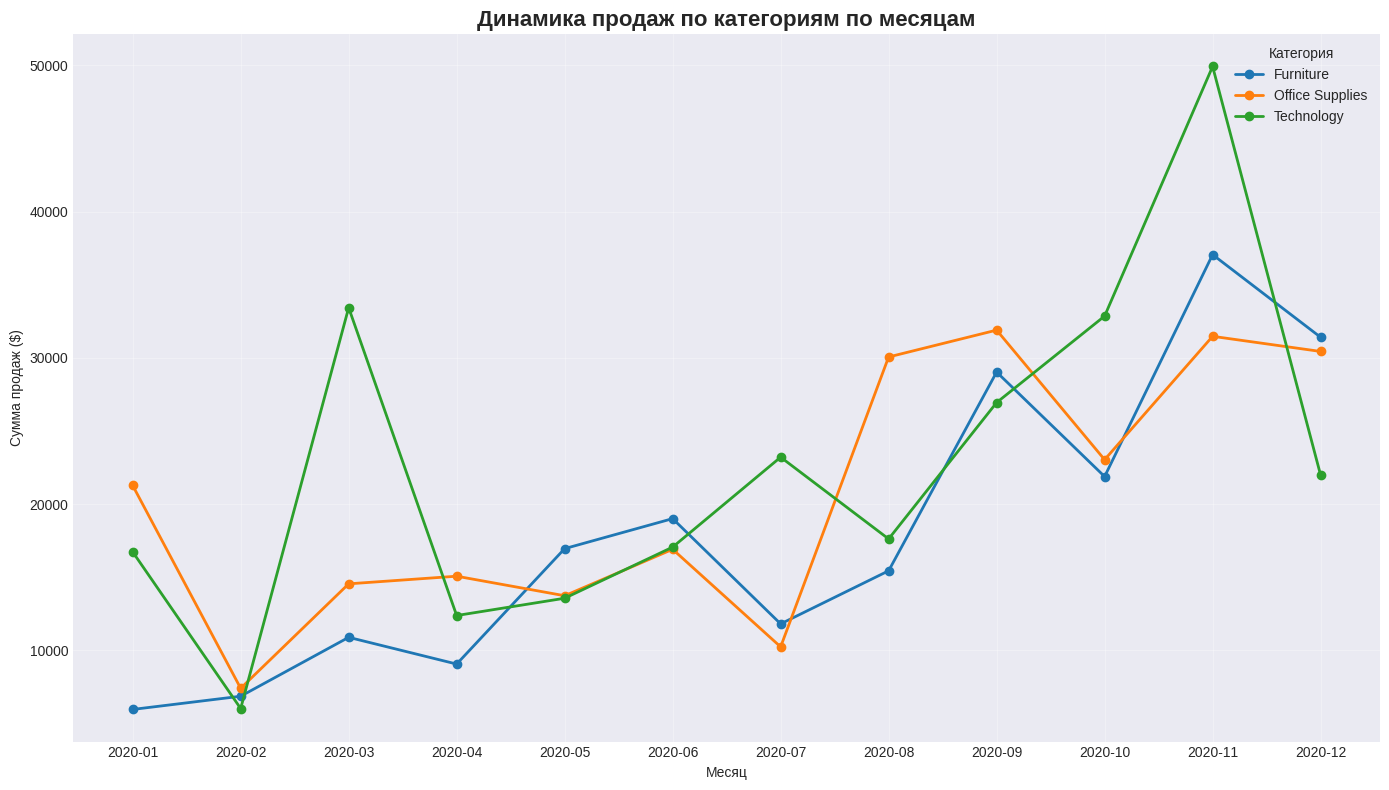


=== АНАЛИЗ ДИНАМИКИ ПО КАТЕГОРИЯМ ===

Furniture:
  Пик продаж: 2020-11 ($37,056.72)
  Минимум продаж: 2020-01 ($5,964.03)
  Амплитуда колебаний: 521.3%

Office Supplies:
  Пик продаж: 2020-09 ($31,895.84)
  Минимум продаж: 2020-02 ($7,407.77)
  Амплитуда колебаний: 330.6%

Technology:
  Пик продаж: 2020-11 ($49,918.77)
  Минимум продаж: 2020-02 ($6,027.02)
  Амплитуда колебаний: 728.2%


In [ ]:
monthly_category_sales = df.pivot_table(
    index='orderMonth',
    columns='category',
    values='sales',
    aggfunc='sum'
).fillna(0)

plt.figure(figsize=(14, 8))
for category in monthly_category_sales.columns:
    plt.plot(monthly_category_sales.index.astype(str),
             monthly_category_sales[category],
             marker='o', linewidth=2, label=category)

plt.title('Динамика продаж по категориям по месяцам', fontsize=16, fontweight='bold')
plt.xlabel('Месяц')
plt.ylabel('Сумма продаж ($)')
plt.legend(title='Категория')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n=== АНАЛИЗ ДИНАМИКИ ПО КАТЕГОРИЯМ ===")
for category in monthly_category_sales.columns:
    max_month = monthly_category_sales[category].idxmax()
    max_value = monthly_category_sales[category].max()
    min_month = monthly_category_sales[category].idxmin()
    min_value = monthly_category_sales[category].min()

    print(f"\n{category}:")
    print(f"  Пик продаж: {max_month} (${max_value:,.2f})")
    print(f"  Минимум продаж: {min_month} (${min_value:,.2f})")
    growth = ((max_value - min_value) / min_value * 100) if min_value > 0 else 0
    print(f"  Амплитуда колебаний: {growth:.1f}%")

# 8. Анализ продаж по локациям

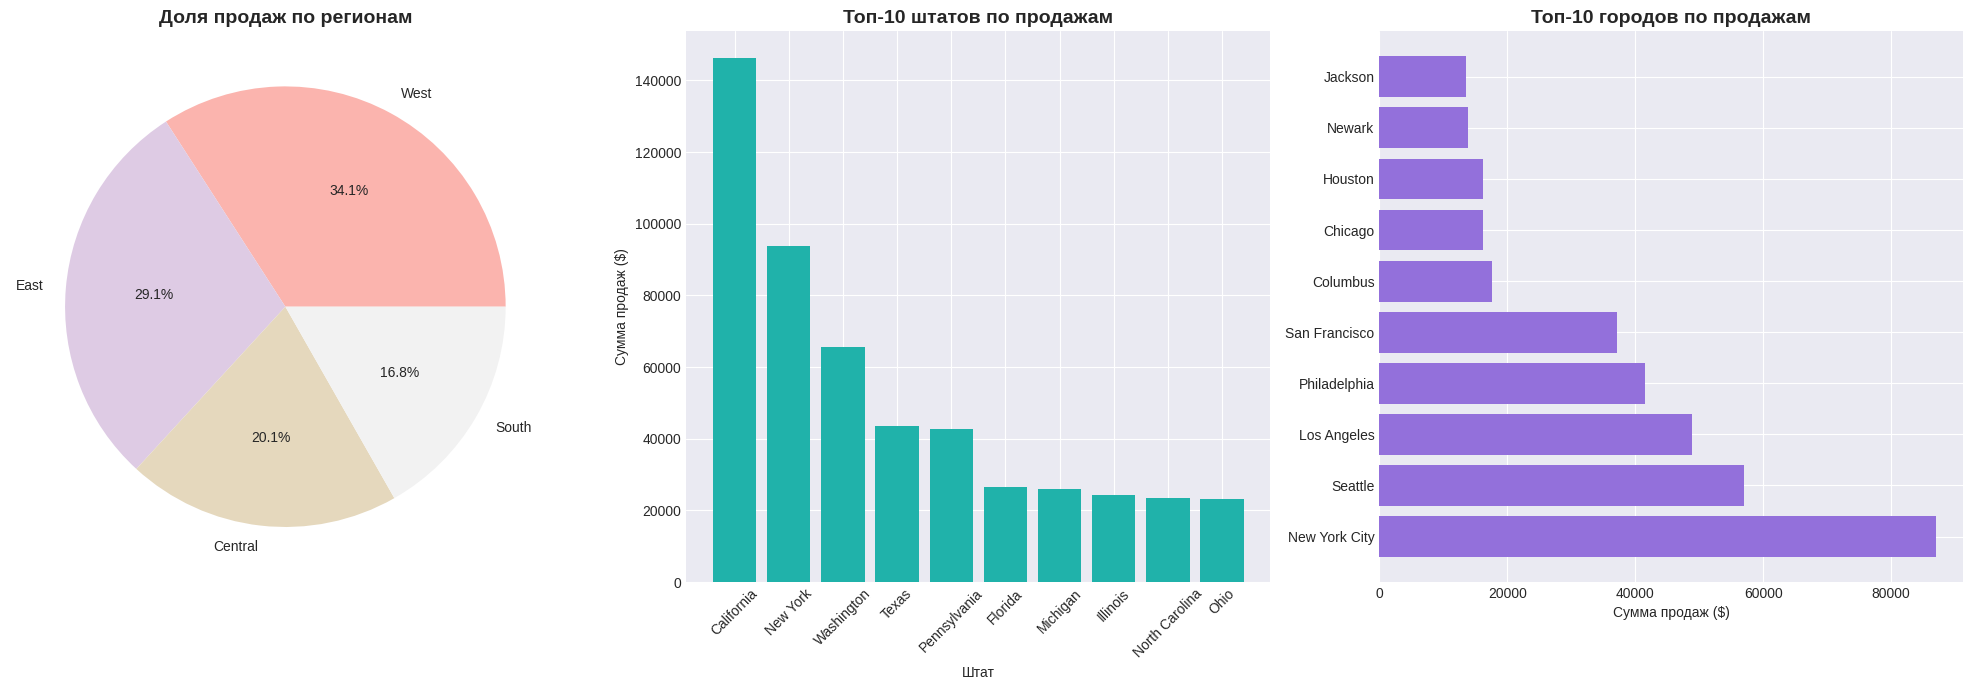


=== АНАЛИЗ ПРОДАЖ ПО ЛОКАЦИЯМ ===
Средний чек по регионам:
  West: $228.43
  East: $231.36
  Central: $189.07
  South: $237.27

Топ-3 штата по продажам:
  1. California: $146,388.34
  2. New York: $93,922.99
  3. Washington: $65,539.90

Топ-3 города по продажам:
  1. New York City: $86,939.60
  2. Seattle: $56,990.82
  3. Los Angeles: $48,875.69


In [ ]:
region_sales = df.groupby('region')['sales'].sum().sort_values(ascending=False)
state_sales = df.groupby('state')['sales'].sum().sort_values(ascending=False).head(10)
city_sales = df.groupby('city')['sales'].sum().sort_values(ascending=False).head(10)

fig, axes = plt.subplots(1, 3, figsize=(20, 7))

axes[0].pie(region_sales.values, labels=region_sales.index, autopct='%1.1f%%',
           colors=plt.cm.Pastel1(np.linspace(0, 1, len(region_sales))))
axes[0].set_title('Доля продаж по регионам', fontsize=14, fontweight='bold')

bars1 = axes[1].bar(state_sales.index, state_sales.values, color='lightseagreen')
axes[1].set_title('Топ-10 штатов по продажам', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Штат')
axes[1].set_ylabel('Сумма продаж ($)')
axes[1].tick_params(axis='x', rotation=45)

bars2 = axes[2].barh(city_sales.index, city_sales.values, color='mediumpurple')
axes[2].set_title('Топ-10 городов по продажам', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Сумма продаж ($)')

plt.tight_layout()
plt.show()

print("\n=== АНАЛИЗ ПРОДАЖ ПО ЛОКАЦИЯМ ===")
print("Средний чек по регионам:")
for region in region_sales.index:
    region_data = df[df['region'] == region]
    avg_check = region_data['sales'].sum() / len(region_data)
    print(f"  {region}: ${avg_check:.2f}")

print("\nТоп-3 штата по продажам:")
for i, (state, sales) in enumerate(state_sales.head(3).items(), 1):
    print(f"  {i}. {state}: ${sales:,.2f}")

print("\nТоп-3 города по продажам:")
for i, (city, sales) in enumerate(city_sales.head(3).items(), 1):
    print(f"  {i}. {city}: ${sales:,.2f}")


# 9. Анализ распределения категорий по городам

In [ ]:
top_cities = df['city'].value_counts().head(5).index

print("\n=== РАСПРЕДЕЛЕНИЕ КАТЕГОРИЙ ПО ГОРОДАМ ===")
for city in top_cities:
    city_data = df[df['city'] == city]
    city_categories = city_data['category'].value_counts()

    print(f"\n{city}:")
    for category, count in city_categories.items():
        percentage = count / len(city_data) * 100
        print(f"  {category}: {count} заказов ({percentage:.1f}%)")


=== РАСПРЕДЕЛЕНИЕ КАТЕГОРИЙ ПО ГОРОДАМ ===

New York City:
  Office Supplies: 176 заказов (57.5%)
  Furniture: 67 заказов (21.9%)
  Technology: 63 заказов (20.6%)

Los Angeles:
  Office Supplies: 125 заказов (59.5%)
  Furniture: 45 заказов (21.4%)
  Technology: 40 заказов (19.0%)

San Francisco:
  Office Supplies: 128 заказов (67.4%)
  Furniture: 34 заказов (17.9%)
  Technology: 28 заказов (14.7%)

Seattle:
  Office Supplies: 104 заказов (57.1%)
  Furniture: 40 заказов (22.0%)
  Technology: 38 заказов (20.9%)

Philadelphia:
  Office Supplies: 98 заказов (53.8%)
  Furniture: 47 заказов (25.8%)
  Technology: 37 заказов (20.3%)


# 10. Заключительные выводы

# ОБЩАЯ СТАТИСТИКА
Период анализа: Январь - Декабрь 2020 года

Общее количество заказов: 1,687

Уникальных клиентов: 693

Среднее количество заказов на клиента: 2.43

Общая сумма продаж: $732,215.25

# КЛЮЧЕВЫЕ ВЫВОДЫ
## 1. ГЕОГРАФИЧЕСКОЕ РАСПРЕДЕЛЕНИЕ
Регионы:

West (Западный регион) - лидер по количеству заказов (33.1%)

East (Восточный регион) - второй по популярности (27.8%)

Central (Центральный регион) - третье место (23.5%)

South (Южный регион) - наименьшее количество заказов (15.6%)

Топ-5 штатов:

California (Калифорния) - 663 заказа (абсолютный лидер)

New York (Нью-Йорк) - 352 заказа

Texas (Техас) - 317 заказов

Washington (Вашингтон) - 215 заказов

Pennsylvania (Пенсильвания) - 197 заказов

Топ-5 городов:

New York City - 306 заказов

Los Angeles - 210 заказов

San Francisco - 190 заказов

Seattle - 182 заказа

Philadelphia - 182 заказа

## 2. ДИНАМИКА ПРОДАЖ
Пик продаж: Ноябрь 2020 ($118,447.82)

Минимум продаж: Февраль 2020 ($20,301.13)

Наибольший рост: От февраля к ноябрю - увеличение в 5.8 раза

Сезонность: Четко выраженная сезонность с пиками в конце года

##3. КАТЕГОРИЙНЫЙ АНАЛИЗ
Категории:

Technology (Технологии) - $271,730.81 (37.1%)

Office Supplies (Офисные принадлежности) - $246,097.17 (33.6%)

Furniture (Мебель) - $215,387.27 (29.4%)

Подкатегории-лидеры:

Phones (Телефоны) - $105,340.52 (14.4%)

Chairs (Стулья) - $95,554.35 (13.0%)

Binders (Папки) - $72,788.04 (9.9%)

Storage (Хранение) - $69,677.62 (9.5%)

Copiers (Копировальные аппараты) - $62,899.39 (8.6%)

##4. ПОПУЛЯРНЫЕ ТОВАРЫ
По количеству заказов:

Easy-staple paper - 16 заказов

Staples - 15 заказов

Staples in misc. colors - 12 заказов

По сумме продаж:

Canon imageCLASS 2200 Advanced Copier - $35,699.90

Martin Yale Chadless Opener Electric Letter Opener - $11,825.90

GBC DocuBind TL300 Electric Binding System - $10,943.28

##5. СЕГМЕНТАЦИЯ КЛИЕНТОВ
Consumer (Потребители):

Количество заказов: 876 (51.9%)

Средний чек: $378.89

Уникальных клиентов: 361

Corporate (Корпоративные):

Количество заказов: 493 (29.2%)

Средний чек: $490.56 (самый высокий!)

Уникальных клиентов: 204

Home Office (Домашний офис):

Количество заказов: 318 (18.8%)

Средний чек: $501.46 (абсолютный максимум!)

Уникальных клиентов: 128

##6. РЕГИОНАЛЬНЫЕ ОСОБЕННОСТИ
Средний чек по регионам:

South: $237.27 (максимальный)

East: $231.36

West: $228.43

Central: $189.07 (минимальный)

Распределение категорий в городах:

Во всех топ-5 городах Office Supplies занимает более 50% заказов

New York City: Office Supplies - 57.5%, Furniture - 21.9%, Technology - 20.6%

San Francisco: Наибольшая доля Office Supplies - 67.4%

#ВЫЯВЛЕННЫЕ ЗАКОНОМЕРНОСТИ
##1. СЕЗОННОСТЬ И ДИНАМИКА
Технологии имеют наибольшую амплитуду колебаний (728.2%)

Пик продаж всех категорий приходится на ноябрь

Минимум продаж - февраль для всех категорий

Технологии показывают наиболее быстрый рост

##2. ГЕОГРАФИЧЕСКИЕ ПАТТЕРНЫ
California доминирует по всем показателям

Западный регион лидирует по количеству заказов

Южный регион имеет самый высокий средний чек

Крупные города сосредоточены на восточном и западном побережьях

##3. КАТЕГОРИЙНЫЕ ПРЕДПОЧТЕНИЯ
Office Supplies - самая популярная категория во всех городах

Technology приносит наибольшую выручку

Phones - самая прибыльная подкатегория

Канцелярские товары имеют стабильный спрос

##4. ПОВЕДЕНИЕ КЛИЕНТОВ
Домашние офисы имеют самый высокий средний чек

Корпоративные клиенты - вторая по чеку группа

Потребители составляют большинство, но имеют наименьший средний чек

Все сегменты имеют схожее количество заказов на клиента (2.4-2.5)

#РЕКОМЕНДАЦИИ ДЛЯ БИЗНЕСА
##1. МАРКЕТИНГОВЫЕ СТРАТЕГИИ
Сфокусироваться на Калифорнии - ключевой рынок с наибольшим потенциалом

Усилить присутствие в Южном регионе - высокий средний чек

Разработать сезонные кампании - учитывать пики в ноябре и спад в феврале

##2. УПРАВЛЕНИЕ АССОРТИМЕНТОМ
Развивать категорию Technology - наибольшая выручка и рост

Оптимизировать складские запасы Office Supplies - стабильный спрос

Продвигать товары с высокой маржой - телефоны, копировальные аппараты

##3. РАБОТА С КЛИЕНТАМИ
Разработать программу лояльности для Home Office - самый высокий чек

Создать специальные условия для корпоративных клиентов

Увеличить средний чек Consumer через кросс-продажи

##4. ЛОГИСТИКА И ДОСТАВКА
Оптимизировать доставку в крупные города - Нью-Йорк, Лос-Анджелес, Сан-Франциско

Учитывать региональные особенности при планировании поставок

Развивать инфраструктуру в Центральном регионе - низкий средний чек

##5. ЦЕНОВАЯ ПОЛИТИКА
Дифференцировать цены по регионам - учитывать разный средний чек

Внедрить динамическое ценообразование с учетом сезонности

Создать пакетные предложения для увеличения среднего чека

#ПЕРСПЕКТИВЫ РОСТА
Расширение в Южном регионе - высокий потенциал роста

Развитие категории мебели - равномерное распределение по регионам

Увеличение доли Technology - наибольшая маржинальность

Привлечение большего количества корпоративных клиентов - высокий средний чек

Оптимизация логистики в Центральном регионе - снижение издержек

#ЗАКЛЮЧЕНИЕ
Анализ данных Amazon Marketplace за 2020 год выявил четкие закономерности в поведении клиентов, географическом распределении и сезонности продаж.

 Ключевыми факторами успеха являются:

Географическая концентрация - Западный и Восточный регионы обеспечивают более 60% продаж

Сезонность - пик продаж в конце года требует особого планирования

Категорийное лидерство Technology - самая прибыльная категория

Высокий потенциал Home Office сегмента - максимальный средний чек

Рекомендации, основанные на данных, позволят оптимизировать бизнес-процессы, увеличить выручку и улучшить клиентский опыт.

Итог: Данные демонстрируют здоровый рост бизнеса с четкими возможностями для оптимизации и расширения в ключевых регионах и сегментах.

